Analytical Expression of Interpolation Function:
8.94903943650061e-5*x**14 - 0.0076111543440867*x**13 + 0.29641792684252*x**12 - 7.00179794519763*x**11 + 111.991503993492*x**10 - 1282.12960372104*x**9 + 10826.1502735577*x**8 - 68437.6688920587*x**7 + 325192.559248094*x**6 - 1154811.9427375*x**5 + 3014200.04349138*x**4 - 5602114.30122754*x**3 + 7001774.59321895*x**2 - 5262411.44308197*x + 1792582.5795216


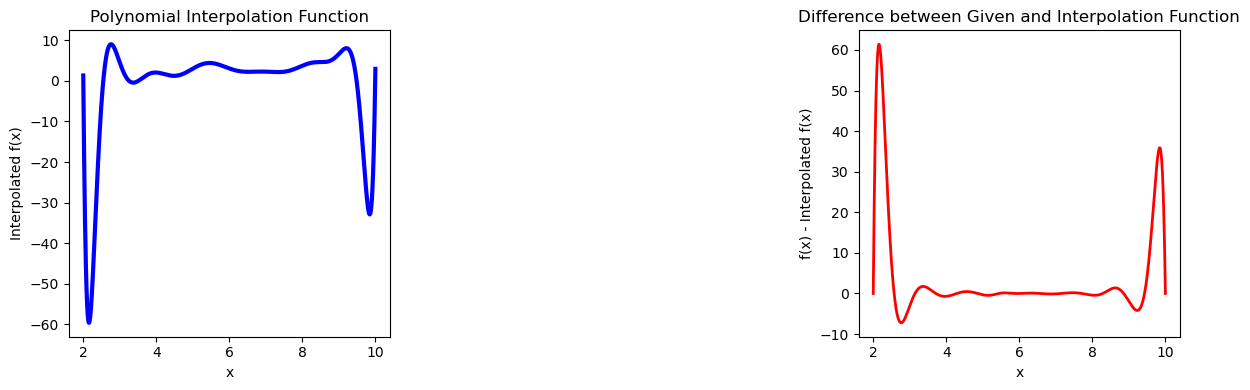

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Given function
def f(x):
    return np.log(x) / (np.sin(2 * x) + 1.5) + x / 5

# Number of points for interpolation
num_points = 15  # You can adjust the number of points as needed

# Abscises distributed uniformly
uniform_nodes = np.linspace(2, 10, num_points)

# Calculate interpolation nodes
Y = f(uniform_nodes)

# Create the Vandermonde matrix
n = len(uniform_nodes)
BaseMatrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        BaseMatrix[i, j] = uniform_nodes[i] ** j

# Solve for the coefficients
coefs = np.linalg.solve(BaseMatrix, Y)

# Generate y values for the polynomial interpolation
xxx_interpolate = np.linspace(2, 10, 1000)
yyy_interpolate = np.zeros_like(xxx_interpolate)

for i in range(n):
    yyy_interpolate += coefs[i] * xxx_interpolate ** i

# Plot the polynomial interpolation function
plt.figure(figsize=(12, 4))

# a. Plot interpolation function
plt.subplot(1, 3, 1)
plt.plot(xxx_interpolate, yyy_interpolate, 'b-', linewidth=3)
plt.title('Polynomial Interpolation Function')
plt.xlabel('x')
plt.ylabel('Interpolated f(x)')

# b. Provide analytical expression of the obtained interpolation function
# Using sympy to create a symbolic representation
x_sym = sp.symbols('x')
interpolation_function = sum(sp.symbols(f'a{i}') * x_sym**i for i in range(n))
interpolation_function = sp.simplify(interpolation_function.subs({sp.symbols(f'a{i}'): coef for i, coef in enumerate(coefs)}))

print(f"Analytical Expression of Interpolation Function:\n{interpolation_function}")

# e. Plot difference between given and interpolation function
plt.subplot(1, 3, 3)
difference = f(xxx_interpolate) - [float(interpolation_function.subs(x_sym, val)) for val in xxx_interpolate]
plt.plot(xxx_interpolate, difference, 'r-', linewidth=2)
plt.title('Difference between Given and Interpolation Function')
plt.xlabel('x')
plt.ylabel('f(x) - Interpolated f(x)')

# Show the plots
plt.tight_layout()
plt.show()
